# I - Content
"The company is a transnational consumer electronics and home entertainment retailer, offering diverse products including home appliances, mobile devices, audio-visual systems, and digital media, operating between 2020–2023.This is a standard dataset that records the company's revenue in detailed transactions."

In [1]:
#Import Libraries
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline


In [2]:
#Data Loading: load the CSV file
df = pd.read_csv('Sales.csv')

In [3]:
#show all the columns
pd.set_option('display.max_columns', None)

In [7]:
#change the columns name by replacing space to '_': 
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df = df.rename(columns=lambda x: x.replace('-', '_'))

In [8]:
#show all the columns name
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Quantity', 'Profit'],
      dtype='object')

In [9]:
#show the shape of dataset: (rows,columns)
df.shape

(300000, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Row_ID         300000 non-null  int64  
 1   Order_ID       300000 non-null  int64  
 2   Order_Date     300000 non-null  object 
 3   Ship_Date      300000 non-null  object 
 4   Ship_Mode      300000 non-null  object 
 5   Customer_ID    300000 non-null  object 
 6   Customer_Name  300000 non-null  object 
 7   Segment        300000 non-null  object 
 8   Country        300000 non-null  object 
 9   Region         300000 non-null  object 
 10  Product_ID     300000 non-null  int64  
 11  Category       300000 non-null  object 
 12  Sub_Category   300000 non-null  object 
 13  Product_Name   300000 non-null  object 
 14  Sales          300000 non-null  int64  
 15  Quantity       300000 non-null  int64  
 16  Profit         300000 non-null  float64
dtypes: float64(1), int64(5), obje

# II - Data Cleaning

#### ❓1. Check missing values:

In [11]:
# check missing values for each column 
df.isna().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

THERE IS NO MISSING VALUES

#### ❓2. Change data types: 

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Row_ID         300000 non-null  int64  
 1   Order_ID       300000 non-null  int64  
 2   Order_Date     300000 non-null  object 
 3   Ship_Date      300000 non-null  object 
 4   Ship_Mode      300000 non-null  object 
 5   Customer_ID    300000 non-null  object 
 6   Customer_Name  300000 non-null  object 
 7   Segment        300000 non-null  object 
 8   Country        300000 non-null  object 
 9   Region         300000 non-null  object 
 10  Product_ID     300000 non-null  int64  
 11  Category       300000 non-null  object 
 12  Sub_Category   300000 non-null  object 
 13  Product_Name   300000 non-null  object 
 14  Sales          300000 non-null  int64  
 15  Quantity       300000 non-null  int64  
 16  Profit         300000 non-null  float64
dtypes: float64(1), int64(5), obje

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date']) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Row_ID         300000 non-null  int64         
 1   Order_ID       300000 non-null  int64         
 2   Order_Date     300000 non-null  datetime64[ns]
 3   Ship_Date      300000 non-null  datetime64[ns]
 4   Ship_Mode      300000 non-null  object        
 5   Customer_ID    300000 non-null  object        
 6   Customer_Name  300000 non-null  object        
 7   Segment        300000 non-null  object        
 8   Country        300000 non-null  object        
 9   Region         300000 non-null  object        
 10  Product_ID     300000 non-null  int64         
 11  Category       300000 non-null  object        
 12  Sub_Category   300000 non-null  object        
 13  Product_Name   300000 non-null  object        
 14  Sales          300000 non-null  int64         
 15  

#### ❓3. Negative Numbers in quantity column

+ Because there is some system error while saving data, some orders will have `quantity < 0`. Now, show sample 10 rows containing quantity < 0

In [15]:
#check negative values 
df[df['Sales']<0]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit


In [16]:
df[df['Quantity']<0]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit


In [17]:
df[df['Profit']<0]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit


====> THERE IS NO NEGATIVE VALUES

#### ❓4. Extracting time infomation

In [18]:
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day
df['weekdays'] = df['Order_Date'].dt.strftime('%a')
df['year_month'] = df['Order_Date'].dt.strftime('%Y-%m')


In [19]:
df.sample(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month
244238,244239,8056977,2020-07-05,2020-07-13,Standard Class,f5006e17-cb8d-4ce8-9315-77d0ae33c7a3,Richard Tran,Home Office,Seychelles,Central,305067,Computers,Projectors & Screens,Contoso Screen 125in M250 Silver,678,3,691.56,7,5,Sun,2020-07
289586,289587,7867560,2021-02-27,2021-03-05,Standard Class,38d374db-7f07-494d-8386-222425004247,Hannah Saunders,Home Office,Kuwait,West,308026,Computers,Computers Accessories,Contoso ADSL Modem Splitter/Filter X 1 E100 Black,37741,47,38118.41,2,27,Sat,2021-02
29648,29649,9194248,2023-08-28,2023-09-03,First Class,428d7c46-6f25-4843-ae23-68ce0128fcb3,Stephanie Martin,Consumer,Burkina Faso,West,306063,Computers,"Printers, Scanners & Fax",Proseware Laser Jet All in one X300 White,5094,9,5195.88,8,28,Mon,2023-08
181622,181623,4908404,2023-11-13,2023-11-15,Standard Class,5270b0a0-476f-433a-b2a1-ae2f00533b5b,Christopher Dickerson,Consumer,Spain,West,806134,Home Appliances,Lamps,Litware Wall Lamp E3015 White,539,1,544.39,11,13,Mon,2023-11
93095,93096,1940806,2021-01-03,2021-01-04,Second Class,47b19d83-a9bb-4152-a55b-c650392a03f9,Elizabeth Solomon,Consumer,Sudan,East,602089,"Music, Movies and Audio Books",Movie DVD,Contoso DVD 14-Inch Player Portable L100 White,33792,44,34129.92,1,3,Sun,2021-01


#### ❓5. Check duplicate value

In [20]:
df.duplicated().any()

np.False_

In [22]:
df.duplicated(subset=['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Profit']).any()

np.False_

In [23]:
df2 = df[['Customer_ID', 'Customer_Name']].drop_duplicates()
df2

,Customer_ID,Customer_Name
0,14e471ac-eed9-42a4-9aa1-386c98402e95,Angela Smith
1,d09d4f7d-5299-4be3-b16d-41bf5c6ebdc6,Anita Perez
2,0507046f-b158-43dc-b475-26e4f684fac5,Maureen Kane
3,a67a62ab-6d95-47ff-a995-52b429c881b7,Donald Thomas
4,272ad67e-2af8-4040-aadc-6c45f8abbe20,Garrett Olson
...,...,...
166390,ec116f9c-d2a3-496a-8ec3-3b582a73b765,Kelsey Brown
167500,d68ed36b-7d4e-4efb-b6ac-c7b8ca2dc3dc,Katie Ball
170883,7a06f8dc-3133-48d4-aafa-bcdb47af85ac,Brian Choi
171916,62d03e44-eedd-4dc0-8f71-616a639dce06,Kathleen Brown


In [24]:
df3 = df[['Product_ID','Category','Product_Name']].drop_duplicates()
df3

,Product_ID,Category,Product_Name
0,802081,Home Appliances,Litware Refrigerator 9.7CuFt M560 Orange
1,505006,Cell phones,Cigarette Lighter Adapter for Contoso Phones E...
2,807005,Home Appliances,Contoso Air conditioner 7000BTU E0260 White
3,702008,Games and Toys,MGS Halo 2 for Windows Vista M220
4,402061,Cameras and camcorders,Contoso SLR Camera X146 Orange
...,...,...,...
14747,702066,Games and Toys,MGS Flight Simulator X Acceleration Expansion ...
15629,203026,TV and Video,Litware Home Theater System 5.1 Channel M512 S...
18781,205028,TV and Video,SV Car Video LCD9.2W X9281 Silver
18936,805024,Home Appliances,Contoso Coffee Maker 4C E0800 Grey


#### ❓6. Filter outliers

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Row_ID         300000 non-null  int64         
 1   Order_ID       300000 non-null  int64         
 2   Order_Date     300000 non-null  datetime64[ns]
 3   Ship_Date      300000 non-null  datetime64[ns]
 4   Ship_Mode      300000 non-null  object        
 5   Customer_ID    300000 non-null  object        
 6   Customer_Name  300000 non-null  object        
 7   Segment        300000 non-null  object        
 8   Country        300000 non-null  object        
 9   Region         300000 non-null  object        
 10  Product_ID     300000 non-null  int64         
 11  Category       300000 non-null  object        
 12  Sub_Category   300000 non-null  object        
 13  Product_Name   300000 non-null  object        
 14  Sales          300000 non-null  int64         
 15  

In [27]:
# Calculate the quantiles -- Tính Q1 và Q3
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
# Calculate the interquantile range
IQR = Q3 - Q1
# Calculate the whisker
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [28]:
#filter lower whisker
dflower = df[(df['Quantity']<= lower)].reset_index()
dflower

,index,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month


In [29]:
#filter upper whisker
dfupper = df[df['Quantity'] >= upper].reset_index()
dfupper

,index,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month


In [30]:
#normal quantity
dfnormal = df[(df['Quantity']> lower) & (df['Quantity'] < upper)].reset_index()
dfnormal.shape

(300000, 22)

<span style="font-size:25px; color:yellow">=====> NO OUTLIER FOUND</span>

In [25]:
df.to_csv('Salescleaned.csv')
df2.to_csv('Customers.csv')
df3.to_csv('Products.csv')


# II - Exploratory Data Analysis (EDA)

#### ❓1. How many monthly active user (MAU) each month?

Text(0, 5385.770833333333, 'Avg.MAU: 5365.77')

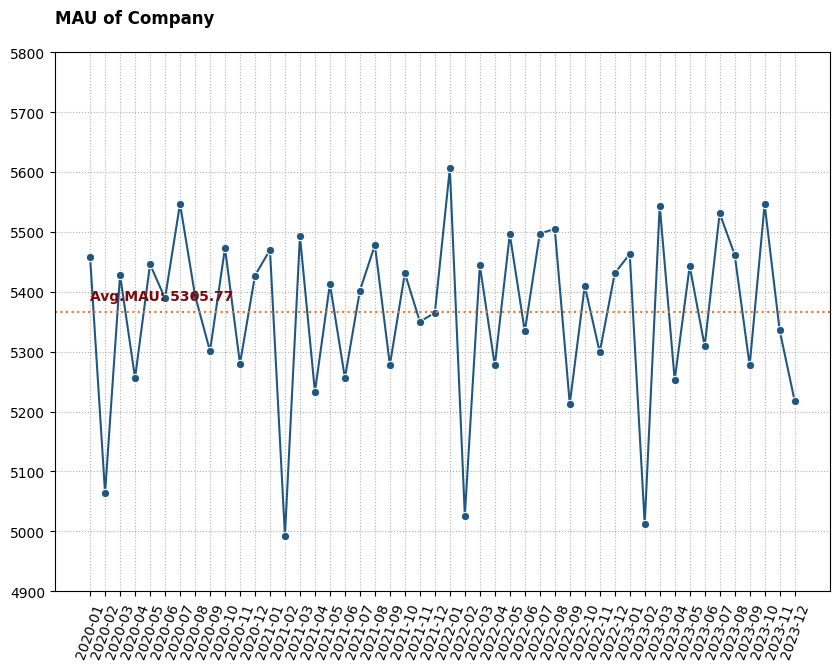

In [34]:
dfplot1 = df.groupby(
    'year_month'
).agg( cust_count = ('Customer_ID','nunique')
      ).reset_index()
meanMAU = dfplot1['cust_count'].mean()
meanMAU
plt.figure(figsize=(10, 7))
sns.lineplot(
    data = dfplot1,
    x = 'year_month',
    y= 'cust_count',
    marker = 'o',
    color = '#205781'
)
plt.ylim(4900,5800)
plt.title('MAU of Company\n',loc ='left',weight='bold')
plt.grid(True, ls = ':')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 70)
plt.axhline(y=meanMAU, ls = ':', color = '#E9762B')
plt.text(x = 0, y = meanMAU + 20, s = 'Avg.MAU: {}'.format(round(meanMAU,2)), weight= 'bold', color = '#7D0A0A')

⭐ Comments:
+ The company's monthly customer base remains relatively stable but shows no significant upward trend over time.
+ On average, approximately 5,366 customers conduct transactions each month.
+ Throughout the entire chart, there are instances where the number of customers drops significantly and then quickly rises again. For example, in December 2021, the number of customers decreased by 477. While this figure is not too substantial compared to the total number of customers, the subsequent increase in customer numbers the following month highlights the instability in maintaining a consistent customer base without frequent fluctuations.

#### ❓2. How are the number of orders and total order amount each month?

In [35]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month
0,1,4149457,2022-06-20,2022-07-04,Second Class,14e471ac-eed9-42a4-9aa1-386c98402e95,Angela Smith,Consumer,Honduras,Central,802081,Home Appliances,Refrigerators,Litware Refrigerator 9.7CuFt M560 Orange,2409,33,2481.27,6,20,Mon,2022-06
1,2,7347703,2022-08-11,2022-08-21,First Class,d09d4f7d-5299-4be3-b16d-41bf5c6ebdc6,Anita Perez,Corporate,Timor-Leste,West,505006,Cell phones,Cell phones Accessories,Cigarette Lighter Adapter for Contoso Phones E...,13455,39,13724.10,8,11,Thu,2022-08
2,3,3154234,2020-03-16,2020-03-31,Same Day,0507046f-b158-43dc-b475-26e4f684fac5,Maureen Kane,Consumer,Anguilla,Central,807005,Home Appliances,Air Conditioners,Contoso Air conditioner 7000BTU E0260 White,5800,25,5916.00,3,16,Mon,2020-03
3,4,4410491,2022-12-02,2022-12-14,Second Class,a67a62ab-6d95-47ff-a995-52b429c881b7,Donald Thomas,Corporate,Svalbard & Jan Mayen Islands,East,702008,Games and Toys,Download Games,MGS Halo 2 for Windows Vista M220,18200,40,18564.00,12,2,Fri,2022-12
4,5,9313309,2022-01-17,2022-01-31,Second Class,272ad67e-2af8-4040-aadc-6c45f8abbe20,Garrett Olson,Home Office,South Georgia and the South Sandwich Islands,South,402061,Cameras and camcorders,Digital SLR Cameras,Contoso SLR Camera X146 Orange,22176,32,22397.76,1,17,Mon,2022-01


In [36]:
dfplot2 = df.groupby('year_month'
           ).agg(order_count = ('Order_ID', 'nunique'),
                 total_amount = ('Sales', 'sum')).reset_index()
dfplot2.sample(5
               )

,year_month,order_count,total_amount
4,2020-05,6322,84938226
12,2021-01,6396,86173198
24,2022-01,6512,87735416
20,2021-09,6154,83919054
34,2022-11,6191,83215311


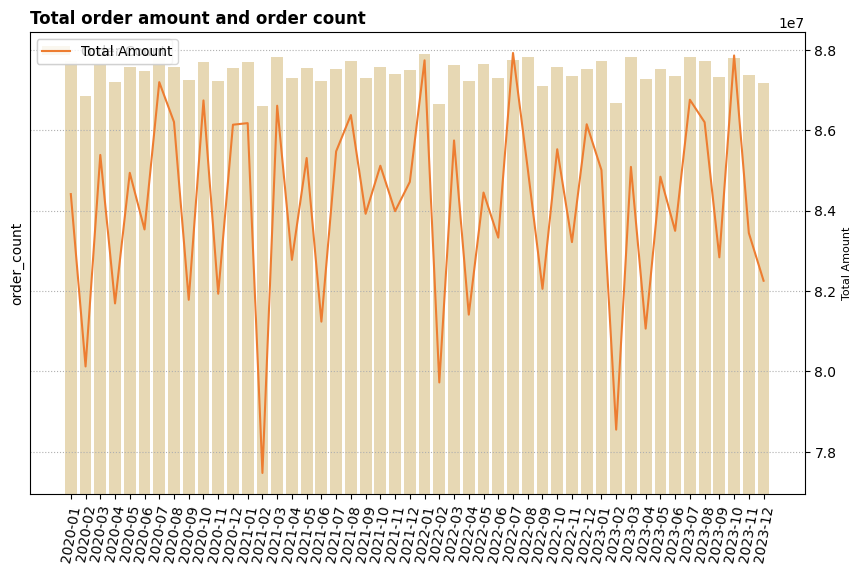

In [38]:
plt.figure(figsize= (10,6))
ax = sns.barplot(
    data = dfplot2,
    x = 'year_month',
    y = 'order_count',
    color= '#EFDCAB',
    label ='Order Count' )
# plt.bar_label(ax.containers[0])
plt.xticks(rotation = 80)
plt.yticks([])
plt.xlabel('')
ax.set_frame_on(False)


plt.twinx()

sns.lineplot(
    data = dfplot2,
    x =  'year_month',
    y = 'total_amount',
    color = '#ED7D31',
    markers='o',
    label = 'Total Amount'
)
# plt.ylim(0,1.4e6)
plt.grid(True, ls = ':')
plt.title('Total order amount and order count', loc = 'left',  weight = 'bold')
plt.ylabel('Total Amount', fontsize = 8)


plt.show()

⭐ Comments:]
+ The order count stay mostly within a relatively narrow range, suggesting that the total number of orders per month is fairly stable over the three‐year period, total order amount indicaté that the monthly total value of orders also remains in a tight band.
+ Despite the fluctuations, both the order count and the total order amount seem relatively steady overall, without a clear long‐term increase or decrease from 2020 to 2022.
+ The repeated ups and downs could point to recurring seasonal factors (for example, lower activity in certain months or spikes during peak seasons), though there is no single, strong spike that dominates the chart.

#### ❓3. Analyze the number of customers by weekdays

In [39]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month
0,1,4149457,2022-06-20,2022-07-04,Second Class,14e471ac-eed9-42a4-9aa1-386c98402e95,Angela Smith,Consumer,Honduras,Central,802081,Home Appliances,Refrigerators,Litware Refrigerator 9.7CuFt M560 Orange,2409,33,2481.27,6,20,Mon,2022-06
1,2,7347703,2022-08-11,2022-08-21,First Class,d09d4f7d-5299-4be3-b16d-41bf5c6ebdc6,Anita Perez,Corporate,Timor-Leste,West,505006,Cell phones,Cell phones Accessories,Cigarette Lighter Adapter for Contoso Phones E...,13455,39,13724.10,8,11,Thu,2022-08
2,3,3154234,2020-03-16,2020-03-31,Same Day,0507046f-b158-43dc-b475-26e4f684fac5,Maureen Kane,Consumer,Anguilla,Central,807005,Home Appliances,Air Conditioners,Contoso Air conditioner 7000BTU E0260 White,5800,25,5916.00,3,16,Mon,2020-03
3,4,4410491,2022-12-02,2022-12-14,Second Class,a67a62ab-6d95-47ff-a995-52b429c881b7,Donald Thomas,Corporate,Svalbard & Jan Mayen Islands,East,702008,Games and Toys,Download Games,MGS Halo 2 for Windows Vista M220,18200,40,18564.00,12,2,Fri,2022-12
4,5,9313309,2022-01-17,2022-01-31,Second Class,272ad67e-2af8-4040-aadc-6c45f8abbe20,Garrett Olson,Home Office,South Georgia and the South Sandwich Islands,South,402061,Cameras and camcorders,Digital SLR Cameras,Contoso SLR Camera X146 Orange,22176,32,22397.76,1,17,Mon,2022-01


In [40]:
dfplot3 = df.groupby('weekdays'
           ).agg(order_count = ('Order_ID', 'nunique')).reset_index()

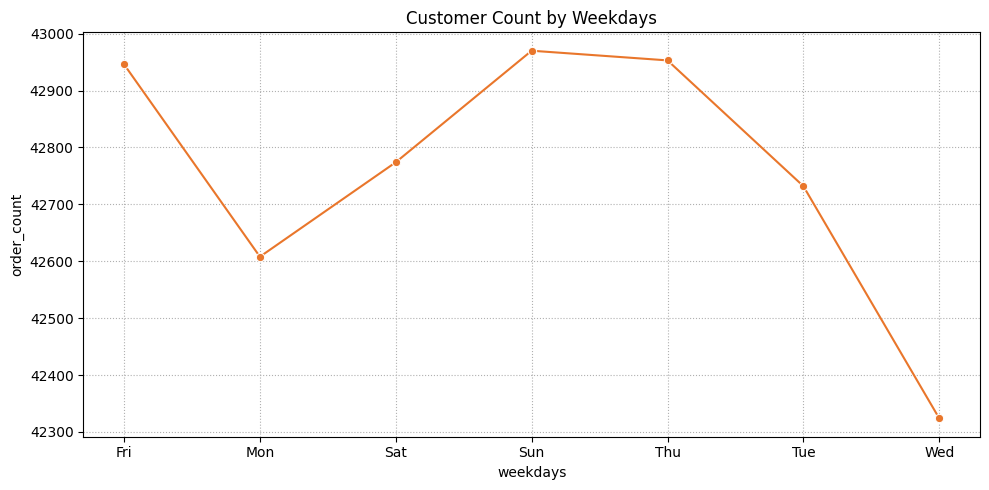

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(data=dfplot3, x="weekdays", y="order_count", color = '#E9762B', marker='o')
plt.title('Customer Count by Weekdays')
plt.grid(True, ls=':')
plt.tight_layout()
plt.show()

⭐ Comments:
+ Sunday has the highest customer count, closely followed by Friday and Thursday.
+ Wednesday shows the lowest number of orders, significantly dropping compared to other days.
+ In general, weekend (especially Sunday) and near-weekend days (Friday/Thursday) attract more customers, while mid-week (Tuesday, Wednesday) tends to have fewer orders.
+ ===> Offering discounts on these days:Tuesday, Wednesday could help increase traffic and sales during typically slower periods.

#### ❓4. Top 10 Contries bring most sales for the company?

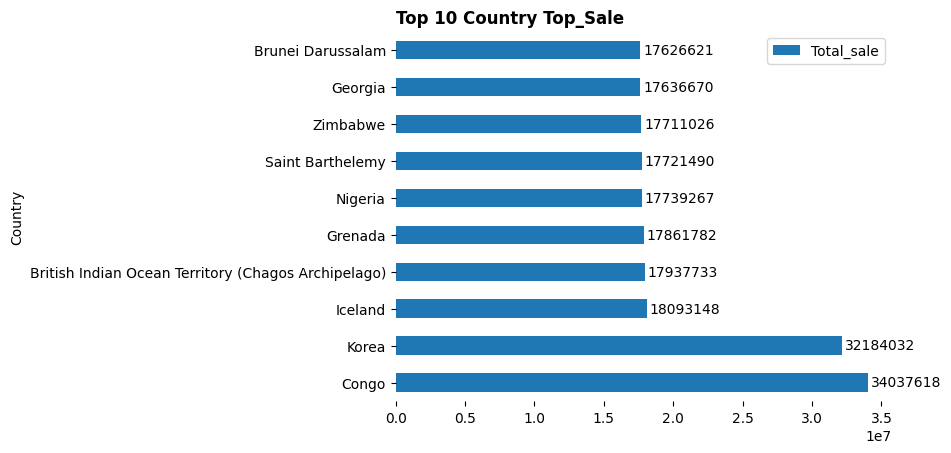

In [42]:
df.head()
ax = df.groupby('Country').agg(
    Total_sale = ('Sales', 'sum')
).sort_values(
    by = 'Total_sale',
    ascending= False
).head(10).plot(
    kind= 'barh'
)
plt.bar_label(ax.containers[0],fmt= '%.0f', padding = 2)
plt.title('Top 10 Country Top_Sale',loc = 'left', weight = 'bold')
ax.set_frame_on(False)


⭐ Comments:
+ Congo tops the chart with approximately 34 million in total sales.
+ Korea follows with over 32 million, forming a clear gap between the first two and the remaining countries.
+ Overall, the chart highlights two leading markets (Congo and Korea) significantly ahead of a cluster of countries at around 17–18 million in total sales.

#### ❓5. Countries with most AOV - Average Order Value

**AOV = [Tổng giá trị đơn hàng]/[Số lượng đơn hàng]**

In [43]:
dfplot5 = df.groupby('Country').agg(
    total_sale = ('Sales', 'sum'),
    total_orders = ('Order_ID','nunique')
)
dfplot5['AOV'] = dfplot5['total_sale']/dfplot5['total_orders']

dfplot5 = dfplot5.sort_values(by = 'AOV', ascending = False).head(10).reset_index()
dfplot5

,Country,total_sale,total_orders,AOV
0,British Indian Ocean Territory (Chagos Archipe...,17937733,1260,14236.296032
1,Jersey,17291292,1219,14184.817063
2,Christmas Island,17255798,1217,14178.963024
3,Mongolia,17007845,1202,14149.621464
4,Cote d'Ivoire,17308193,1225,14129.137143
5,Nigeria,17739267,1256,14123.620223
6,Iraq,16718366,1184,14120.241554
7,Brunei Darussalam,17626621,1249,14112.586869
8,Belarus,17215661,1221,14099.640459
9,Reunion,16221509,1152,14081.171007


Text(0.0, 1.0, 'Top 10 countries most AOV\n')

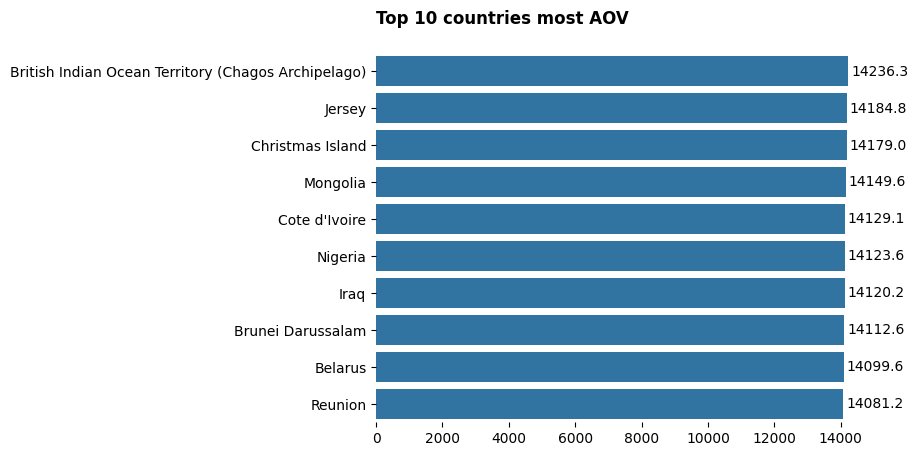

In [45]:
ax = sns.barplot(
    data = dfplot5,
    x = 'AOV',
    y = 'Country'
    )
plt.bar_label(ax.containers[0], fmt = '{:.1f}', padding = 2)
plt.xlabel('')
plt.ylabel('')
ax.set_frame_on(False)
plt.title('Top 10 countries most AOV\n', loc = 'left', weight = 'bold')

⭐ Comments:
+ British Indian Ocean Territory (Chagos Archipelago) tops the list with an AOV of 14,236.3, followed closely by Jersey at 14,184.8.
+ This indicates that these countries share relatively similar (and high) spending patterns per order, with only a small difference of roughly 150 units between the highest and lowest AOV among the group.
+ Overall, the chart reveals that these top 10 countries have consistently high average order values, with only a slight variation at the upper end of the range.

#### ❓6. Analyze new or returning customers on a monthly basis throughout the year.

In [46]:
# Identifying new customers by month:: 
newcustdf = df.groupby('Customer_ID').agg(
    first_trans_date = ('Order_Date','min')).reset_index()
display(newcustdf)


,Customer_ID,first_trans_date
0,0000001d-6b2e-4c50-85ae-9271b879b8c7,2020-04-08
1,00004d30-8b3b-4e77-88f2-4902f1e98720,2020-04-17
2,0003e7b1-745a-4bd4-9498-fd41a55740a5,2020-01-11
3,00084e4c-98c3-46b0-9615-fe23c8b02c40,2020-07-07
4,000b8ee0-46f9-4c5a-a971-7d7f76fbf5fa,2020-01-29
...,...,...
19995,ffe068d1-b25c-4234-9dfe-19768bf3dae7,2020-03-07
19996,ffe387f9-0440-4454-a1c9-94c5f21b78ea,2020-07-29
19997,ffe3ce51-895d-4683-9936-baed70ca5e08,2020-07-05
19998,ffe65bd3-8ab9-482b-adc2-cee1ef69c1ea,2020-01-06


In [47]:
df = df.merge(
    right = newcustdf,
    how = 'left',
    on = 'Customer_ID'
)

In [48]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month,first_trans_date
0,1,4149457,2022-06-20,2022-07-04,Second Class,14e471ac-eed9-42a4-9aa1-386c98402e95,Angela Smith,Consumer,Honduras,Central,802081,Home Appliances,Refrigerators,Litware Refrigerator 9.7CuFt M560 Orange,2409,33,2481.27,6,20,Mon,2022-06,2020-01-07
1,2,7347703,2022-08-11,2022-08-21,First Class,d09d4f7d-5299-4be3-b16d-41bf5c6ebdc6,Anita Perez,Corporate,Timor-Leste,West,505006,Cell phones,Cell phones Accessories,Cigarette Lighter Adapter for Contoso Phones E...,13455,39,13724.10,8,11,Thu,2022-08,2020-01-13
2,3,3154234,2020-03-16,2020-03-31,Same Day,0507046f-b158-43dc-b475-26e4f684fac5,Maureen Kane,Consumer,Anguilla,Central,807005,Home Appliances,Air Conditioners,Contoso Air conditioner 7000BTU E0260 White,5800,25,5916.00,3,16,Mon,2020-03,2020-03-16
3,4,4410491,2022-12-02,2022-12-14,Second Class,a67a62ab-6d95-47ff-a995-52b429c881b7,Donald Thomas,Corporate,Svalbard & Jan Mayen Islands,East,702008,Games and Toys,Download Games,MGS Halo 2 for Windows Vista M220,18200,40,18564.00,12,2,Fri,2022-12,2020-01-09
4,5,9313309,2022-01-17,2022-01-31,Second Class,272ad67e-2af8-4040-aadc-6c45f8abbe20,Garrett Olson,Home Office,South Georgia and the South Sandwich Islands,South,402061,Cameras and camcorders,Digital SLR Cameras,Contoso SLR Camera X146 Orange,22176,32,22397.76,1,17,Mon,2022-01,2020-02-12


In [49]:
df['cust_Type'] = 'returning'
df.loc[df['Order_Date'] == df.first_trans_date,'cust_Type'] = 'new'
df



,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month,first_trans_date,cust_Type
0,1,4149457,2022-06-20,2022-07-04,Second Class,14e471ac-eed9-42a4-9aa1-386c98402e95,Angela Smith,Consumer,Honduras,Central,802081,Home Appliances,Refrigerators,Litware Refrigerator 9.7CuFt M560 Orange,2409,33,2481.27,6,20,Mon,2022-06,2020-01-07,returning
1,2,7347703,2022-08-11,2022-08-21,First Class,d09d4f7d-5299-4be3-b16d-41bf5c6ebdc6,Anita Perez,Corporate,Timor-Leste,West,505006,Cell phones,Cell phones Accessories,Cigarette Lighter Adapter for Contoso Phones E...,13455,39,13724.10,8,11,Thu,2022-08,2020-01-13,returning
2,3,3154234,2020-03-16,2020-03-31,Same Day,0507046f-b158-43dc-b475-26e4f684fac5,Maureen Kane,Consumer,Anguilla,Central,807005,Home Appliances,Air Conditioners,Contoso Air conditioner 7000BTU E0260 White,5800,25,5916.00,3,16,Mon,2020-03,2020-03-16,new
3,4,4410491,2022-12-02,2022-12-14,Second Class,a67a62ab-6d95-47ff-a995-52b429c881b7,Donald Thomas,Corporate,Svalbard & Jan Mayen Islands,East,702008,Games and Toys,Download Games,MGS Halo 2 for Windows Vista M220,18200,40,18564.00,12,2,Fri,2022-12,2020-01-09,returning
4,5,9313309,2022-01-17,2022-01-31,Second Class,272ad67e-2af8-4040-aadc-6c45f8abbe20,Garrett Olson,Home Office,South Georgia and the South Sandwich Islands,South,402061,Cameras and camcorders,Digital SLR Cameras,Contoso SLR Camera X146 Orange,22176,32,22397.76,1,17,Mon,2022-01,2020-02-12,returning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,5700579,2020-04-25,2020-05-07,Second Class,69e1a2cd-b55b-43c0-b515-e8e9e4b202e0,Melissa Palmer,Home Office,Saint Helena,Central,205004,TV and Video,Car Video,SV Car Video TFT6.2W E6280 Black,14540,20,14830.80,4,25,Sat,2020-04,2020-01-28,returning
299996,299997,8313733,2023-01-05,2023-01-06,Second Class,3451dd20-3a05-459b-a23c-c7660e6989dd,Alison Griffin,Consumer,Nigeria,Central,504001,Cell phones,Smart phones & PDAs,The Phone Company Smart phones without camera ...,31958,38,32916.74,1,5,Thu,2023-01,2020-05-11,returning
299997,299998,8662855,2020-12-08,2020-12-13,Standard Class,a1eaa86a-6c3f-4404-bfb5-2cfb289f468c,Carrie George,Corporate,Singapore,East,803096,Home Appliances,Microwaves,Contoso Microwave 0.8CuFt E0080 Red,8379,21,8630.37,12,8,Tue,2020-12,2020-02-18,returning
299998,299999,3197640,2021-10-27,2021-11-03,Second Class,7db298a1-fe29-479f-a66f-5955f41dda2b,Robert Butler,Corporate,Solomon Islands,South,602070,"Music, Movies and Audio Books",Movie DVD,Contoso DVD 60 DVD Storage Binder L20 Red,13494,26,13763.88,10,27,Wed,2021-10,2020-02-14,returning


In [50]:
dfplot6 = df.groupby(['year_month','cust_Type']).agg(
    cust_count = ('Customer_ID','nunique')
)
dfplot6.head()

cust_count
year_month cust_Type            
2020-01    new              5458
           returning         837
2020-02    new              3701
           returning        1877
2020-03    new              2933

Text(0.0, 1.0, 'Quantity Customer Type in Month')

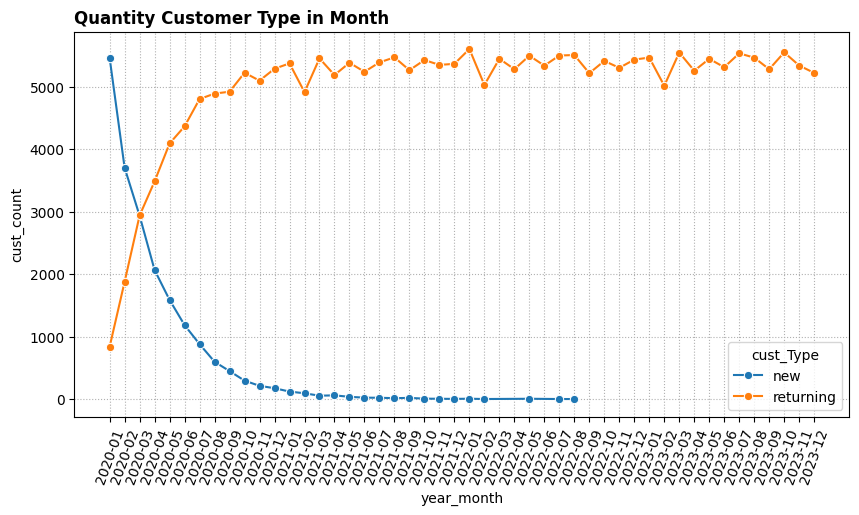

In [51]:
plt.figure(figsize= (10,5))
sns.lineplot(
    data = dfplot6,
    x = 'year_month',
    y = 'cust_count',
    hue = 'cust_Type',
    marker= 'o'
)
plt.xticks(rotation = 70)
plt.grid(True, ls = ':')
plt.title('Quantity Customer Type in Month', loc = 'left', weight = 'bold')

⭐ Comments:
+ As we move into subsequent months, the new-customer count sharply declines and stabilizes near zero, while returning customers increase dramatically and level out around 5,000 per month from 2021 onward
+ This pattern suggests that after an initial influx of new customers early on, nearly all later activity is from returning customers. It may be a reflection of how the data was collected or a real scenario where most users who joined initially continue to repurchase, and very few truly “new” users are added later.
+====> It is necessary to launch major marketing programs to increase the number of new customers and take care of existing customers to maintain the current level of customer retention effectively.

#### ❓6. Considering the new customers of March 2020, what is the average transaction value of these customers in each month when they return?

In [60]:
df.head(3)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,month,day,weekdays,year_month,first_trans_date,cust_Type,firstTranxTime,customer_type
0,1,4149457,2022-06-20,2022-07-04,Second Class,14e471ac-eed9-42a4-9aa1-386c98402e95,Angela Smith,Consumer,Honduras,Central,802081,Home Appliances,Refrigerators,Litware Refrigerator 9.7CuFt M560 Orange,2409,33,2481.27,6,20,Mon,2022-06,2020-01-07,returning,2020-01-07,old customer
1,2,7347703,2022-08-11,2022-08-21,First Class,d09d4f7d-5299-4be3-b16d-41bf5c6ebdc6,Anita Perez,Corporate,Timor-Leste,West,505006,Cell phones,Cell phones Accessories,Cigarette Lighter Adapter for Contoso Phones E...,13455,39,13724.10,8,11,Thu,2022-08,2020-01-13,returning,2020-01-13,old customer
2,3,3154234,2020-03-16,2020-03-31,Same Day,0507046f-b158-43dc-b475-26e4f684fac5,Maureen Kane,Consumer,Anguilla,Central,807005,Home Appliances,Air Conditioners,Contoso Air conditioner 7000BTU E0260 White,5800,25,5916.00,3,16,Mon,2020-03,2020-03-16,new,2020-03-16,new customer


In [62]:

# Extract new customers in March 2020: 
ym = '2020-03'
new_customer_in_ym = df[(df['year_month'] == ym) & (df['cust_Type'] == 'new')]['Customer_ID'].unique()

# Calculate the Total Sales of each new customer from March 2020 over subsequent months.
new_customer_sum_order_amount = df[df['Customer_ID'].isin(new_customer_in_ym)].groupby(
    ['year_month', 'Customer_ID']
)['Sales'].sum().reset_index()

# Calculate the average transaction value per customer for each month: 
dfplot = new_customer_sum_order_amount.groupby(
    'year_month'
).agg(
    mean_customer_amount = ('Sales', 'mean')
).reset_index()
dfplot.head()

,year_month,mean_customer_amount
0,2020-03,15598.059325
1,2020-04,16037.186107
2,2020-05,15362.619845
3,2020-06,15893.906977
4,2020-07,15965.002392


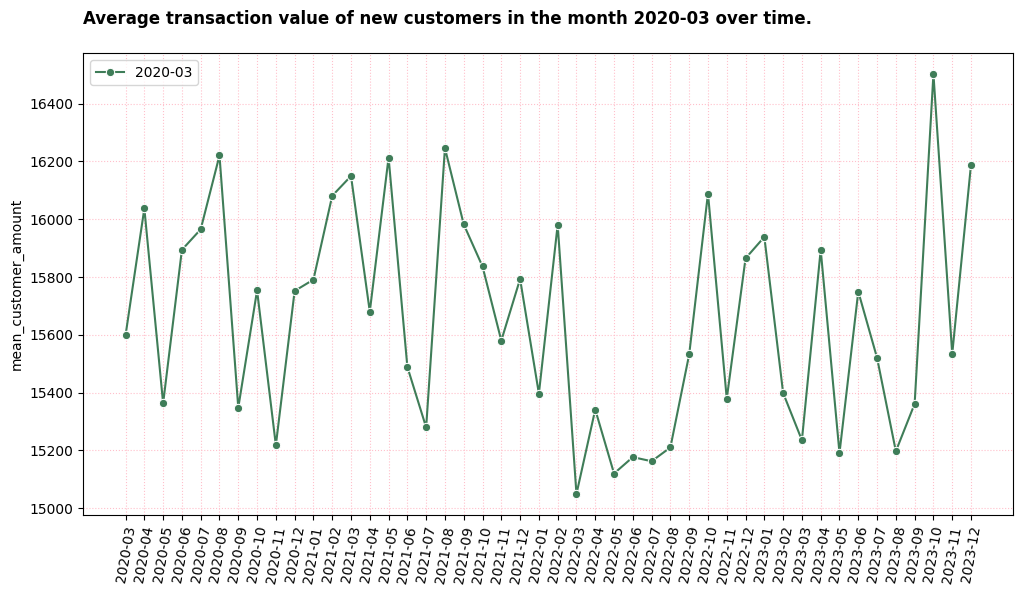

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data = dfplot,
    x = 'year_month',
    y = 'mean_customer_amount',
    marker='o',
    label = ym,
    color = '#3F7D58'
)

plt.title(f'Average transaction value of new customers in the month {ym} over time.\n', weight = 'bold', loc='left')
plt.xticks(rotation=80), plt.xlabel('')
plt.grid(True, ls = ':', color = 'pink')
plt.show()
# plt.ylim(0, 70)

⭐ Comments:
+ The average transaction value generally oscillates between 15,000 and 16,400, indicating moderate variation rather than a single stable trend.
+ These fluctuations suggest that the spending behavior of this particular cohort (new customers acquired in March 2020) is not strictly increasing or decreasing but varies over time—possibly due to seasonality, promotions, or changing economic conditions.
+ ===> The company is retaining customers very well, with stable customer return rates and relatively consistent spending levels over time.